In [1]:
import os, sys
import numpy as np

import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

from mitequinox.utils import *
#from mitequinox.binary import *
import mitequinox.parcels as pa
from xmitgcm import llcreader
from fsspec.implementations.local import LocalFileSystem

INFO: Compiled ParcelsRandom ==> /dev/shm/pbs.4257525.datarmor0/parcels-502090/libparcels_random_27c932e4-81bf-4b5a-9600-e750c0d1969e.so


In [2]:
from dask.distributed import Client, LocalCluster
#
#cluster = LocalCluster()
#
from dask_jobqueue import PBSCluster
cluster = PBSCluster(processes=7, cores=7)
w = cluster.scale(jobs=3)
#
client = Client(cluster)
client

Client Scheduler: tcp://10.148.0.109:45954 Dashboard: http://10.148.0.109:8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [3]:
import pyinterp

mesh = pyinterp.RTree()

In [4]:
V = ["Eta", "SSU", "SSV", "SST", "SSS"]
D = ["mean"]#, "mean_square"]
ds = xr.merge([load_diagnostic(d+"_"+v).rename({v:d+"_"+v}) 
               for v in V for d in D])

In [5]:
grd = load_grd(V=['XC','YC'])
ds = xr.merge([grd,ds])

In [6]:
ds

<xarray.Dataset>
Dimensions:   (face: 13, i: 4320, i_g: 4320, j: 4320, j_g: 4320)
Coordinates:
    XC        (face, j, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    YC        (face, j, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
  * face      (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i         (i) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j         (j) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * i_g       (i_g) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j_g       (j_g) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
Data variables:
    mean_Eta  (face, j, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    mean_SSU  (face, j, i_g) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    mean_SSV  (face, j_g, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    mean_SST  (face, j, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    mean_SSS  (face, j, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>

In [7]:
ds = ds.isel(i = slice(0,None,4), j = slice(0,None,4), i_g = slice(0,None,4), j_g = slice(0,None,4))
ds['lon'] = 0*ds.face+ds.XC
ds['lat'] = 0*ds.face+ds.YC
ds.load()

<xarray.Dataset>
Dimensions:   (face: 13, i: 1080, i_g: 1080, j: 1080, j_g: 1080)
Coordinates:
    XC        (face, j, i) float32 -114.93228 -114.93183 ... -114.52893
    YC        (face, j, i) float32 -88.17715 -88.18883 ... -88.16518 -88.165405
  * face      (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i         (i) int64 0 4 8 12 16 20 24 ... 4292 4296 4300 4304 4308 4312 4316
  * j         (j) int64 0 4 8 12 16 20 24 ... 4292 4296 4300 4304 4308 4312 4316
  * i_g       (i_g) int64 0 4 8 12 16 20 24 ... 4296 4300 4304 4308 4312 4316
  * j_g       (j_g) int64 0 4 8 12 16 20 24 ... 4296 4300 4304 4308 4312 4316
Data variables:
    mean_Eta  (face, j, i) float32 nan nan nan nan nan ... nan nan nan nan nan
    mean_SSU  (face, j, i_g) float32 nan nan nan nan nan ... nan nan nan nan nan
    mean_SSV  (face, j_g, i) float32 nan nan nan nan nan ... nan nan nan nan nan
    mean_SST  (face, j, i) float32 nan nan nan nan nan ... nan nan nan nan nan
    mean_SSS  (face, j, i) float32 nan nan nan nan nan ... nan nan nan nan nan
    lon       (face, j, i) float64 -114.9 -114.9 -114.9 ... -113.5 -114.0 -114.5
    lat       (face, j, i) float64 -88.18 -88.19 -88.2 ... -88.16 -88.17 -88.17

In [4]:
#grd = load_grd(V=['XC','YC'])
#ds = load_data(['SSU','SSV'])
#ds = xr.merge([grd,ds])

#print('\n data size (all faces): %.1f GB' %(ds['SSU'].nbytes / 1e9))
#print('\n data size (1 face): %.1f GB' %(ds['SSU'].isel(face=1).nbytes / 1e9))
#ds


 data size (all faces): 8525.4 GB

 data size (1 face): 655.8 GB


<xarray.Dataset>
Dimensions:  (face: 13, i: 4320, i_g: 4320, j: 4320, j_g: 4320, time: 8785)
Coordinates:
    XC       (face, j, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    YC       (face, j, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
  * i        (i) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j        (j) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
    niter    (time) int64 dask.array<chunksize=(200,), meta=np.ndarray>
  * time     (time) datetime64[ns] 2011-11-15 2011-11-15T01:00:00 ... 2012-11-15
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
Data variables:
    SSU      (time, face, j, i_g) float32 dask.array<chunksize=(1, 1, 4320, 4320), meta=np.ndarray>
    SSV      (time, face, j_g, i) float32 dask.array<chunksize=(1, 1, 4320, 4320), meta=np.ndarray>

In [13]:
#ds = ds.sel(face=1)
#sli = slice(0,None,4) # required to make worldwide plots, otherwise, half the globe is plotted
#ds = ds.isel(i=sli, j=sli, i_g=sli, j_g=sli)
#ds = ds.drop('dtime') # tmp leads to serialization issue at plots
#
#ds = ds.persist()
#
#print(ds)
#print('\n dataset size: %.1f GB' %(ds.nbytes / 1e9))

In [8]:
lons = ds["XC"]#.isel(i=sli, j=sli)
lats = ds["YC"]#.isel(i=sli, j=sli)

In [9]:
ds

<xarray.Dataset>
Dimensions:   (face: 13, i: 1080, i_g: 1080, j: 1080, j_g: 1080)
Coordinates:
    XC        (face, j, i) float32 -114.93228 -114.93183 ... -114.52893
    YC        (face, j, i) float32 -88.17715 -88.18883 ... -88.16518 -88.165405
  * i         (i) int64 0 4 8 12 16 20 24 ... 4292 4296 4300 4304 4308 4312 4316
  * j         (j) int64 0 4 8 12 16 20 24 ... 4292 4296 4300 4304 4308 4312 4316
  * face      (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i_g       (i_g) int64 0 4 8 12 16 20 24 ... 4296 4300 4304 4308 4312 4316
  * j_g       (j_g) int64 0 4 8 12 16 20 24 ... 4296 4300 4304 4308 4312 4316
Data variables:
    mean_Eta  (face, j, i) float32 nan nan nan nan nan ... nan nan nan nan nan
    mean_SSU  (face, j, i_g) float32 nan nan nan nan nan ... nan nan nan nan nan
    mean_SSV  (face, j_g, i) float32 nan nan nan nan nan ... nan nan nan nan nan
    mean_SST  (face, j, i) float32 nan nan nan nan nan ... nan nan nan nan nan
    mean_SSS  (face, j, i) float32 nan nan nan nan nan ... nan nan nan nan nan
    lon       (face, j, i) float64 -114.9 -114.9 -114.9 ... -113.5 -114.0 -114.5
    lat       (face, j, i) float64 -88.18 -88.19 -88.2 ... -88.16 -88.17 -88.17

In [10]:
sli = slice(0,None,1)

In [11]:
mesh.packing(
    np.vstack((ds.lon.isel(face=1,i=sli,j=sli).values.flatten(), ds.lat.isel(face=1,i=sli,j=sli).values.flatten())).T,
    ds.mean_SSV.isel(face=1,i=sli,j_g=sli).values.flatten())

In [12]:
#x0, x1 = -30, -20
#y0, y1 = -55, -30
x0,x1 = np.around(ds.lon.isel(face=1).values.min()),np.around(ds.lon.isel(face=1).values.max())
y0,y1 = np.around(ds.lat.isel(face=1).values.min()),np.around(ds.lat.isel(face=1).values.max())
res = 1 / 32.0
mx, my = np.meshgrid(np.arange(x0, x1, res),
                        np.arange(y0, y1, res),
                        indexing="ij")

In [17]:
idw_eta, neighbors = mesh.inverse_distance_weighting(
    np.vstack((mx.flatten(), my.flatten())).T,
    within=True,  # Extrapolation is forbidden
    radius=None,  # In a radius of 5.5 Km
    k=8,  # We are looking for at most 8 neighbours
    num_threads=0)
idw_eta = idw_eta.reshape(mx.shape)

In [18]:
rbf_eta, neighbors = mesh.radial_basis_function(
    np.vstack((mx.flatten(), my.flatten())).T,
    within=True,  # Extrapolation is forbidden
    k=11,  # We are looking for at most 11 neighbours
    num_threads=0)
rbf_eta = rbf_eta.reshape(mx.shape)

(12.0, 42.0)

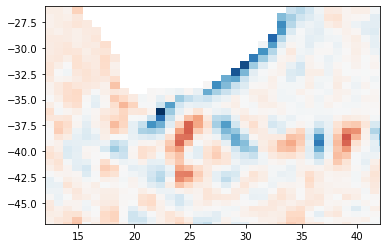

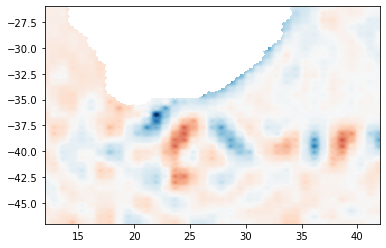

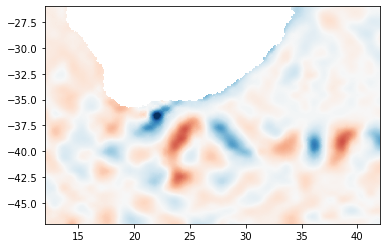

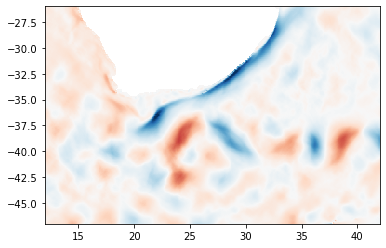

In [29]:

plt.pcolormesh(ds.lon.isel(face=1,i=sli,j=sli),ds.lat.isel(face=1,i=sli,j=sli),ds.mean_SSV.isel(face=1,i=sli,j_g=sli),cmap='RdBu_r',vmin=-1,vmax=1)
plt.ylim(y0+10,y1-40);plt.xlim(x0+50,x1-10)
plt.figure()
plt.pcolormesh(mx,my,idw_eta,cmap='RdBu_r',vmin=-1,vmax=1)
plt.ylim(y0+10,y1-40);plt.xlim(x0+50,x1-10)
plt.figure()
plt.pcolormesh(mx,my,rbf_eta,cmap='RdBu_r',vmin=-1,vmax=1)
plt.ylim(y0+10,y1-40);plt.xlim(x0+50,x1-10)
plt.figure()
plt.pcolormesh(ds.lon.isel(face=1),ds.lat.isel(face=1),ds.mean_SSV.isel(face=1),cmap='RdBu_r',vmin=-1,vmax=1)
plt.ylim(y0+10,y1-40);plt.xlim(x0+50,x1-10)

In [19]:
root_dir = '/home1/datawork/aponte/parcels/'
run_name = 'global_extra_T365j_dt1j_dij50'

p = pa.parcels_output(root_dir+run_name, parquets=['trajectory'])
df = p.df['trajectory']
df.head()

,time,lat,lon,z,zonal_velocity,meridional_velocity,sea_level,temperature,salinity
trajectory,,,,,,,,,
39000000,2011-11-15,57.835732,-178.867081,0.0,0.0,0.0,0.0,0.0,0.0
39000001,2011-11-15,58.429878,-178.871994,0.0,0.0,0.0,0.0,0.0,0.0
39000002,2011-11-15,59.018066,-178.879623,0.0,0.0,0.0,0.0,0.0,0.0
39000003,2011-11-15,59.600288,-178.890015,0.0,0.0,0.0,0.0,0.0,0.0
39000004,2011-11-15,60.176525,-178.903275,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
df = pa.degs2ms(df)
df = df.persist()

In [21]:
df

,time,lat,lon,z,zonal_velocity,meridional_velocity,sea_level,temperature,salinity
npartitions=404,,,,,,,,,
,datetime64[ns],float64,float64,float64,float64,float32,float32,float32,float32
,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...


In [16]:
def interp_trajectories(df,columns,var_mean,radius,k,method):
    df_interp = df.copy()
    for i,V in enumerate(columns):
        mesh.packing(
        np.vstack((ds.lon.isel(face=1).values.flatten(), ds.lat.isel(face=1).values.flatten())).T,
        ds[var_mean[i]].isel(face=1).values.flatten())
        
        mx, my = np.meshgrid(df.lon,
                            df.lat,
                            indexing="ij")
        if method=='idw':
            idw_eta, neighbors = mesh.inverse_distance_weighting(
            np.vstack((mx.flatten(), my.flatten())).T,
            within=True,  # Extrapolation is forbidden
            radius=radius,  # In a radius of 5.5 Km
            k=k,  # We are looking for at most 8 neighbours
            num_threads=0)
            interp_var = idw_eta.reshape(mx.shape)
        if method=='rbf':
            rbf_eta, neighbors = mesh.radial_basis_function(
            np.vstack((mx.flatten(), my.flatten())).T,
            within=True,  # Extrapolation is forbidden
            k=k,  # We are looking for at most 11 neighbours
            num_threads=0)
            interp_var = rbf_eta.reshape(mx.shape)
        df_interp[V] = np.diag(interp_var)
    return df_interp

In [22]:
df_tst = df.groupby(df.index).get_group(4000125).compute()


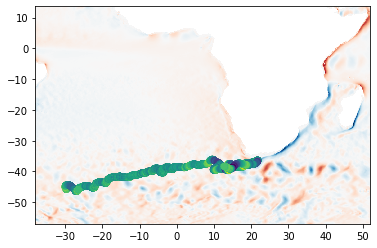

In [18]:
plt.pcolormesh(ds.lon.isel(face=1),ds.lat.isel(face=1),ds.mean_SSV.isel(face=1),cmap='RdBu_r',vmin=-1,vmax=1)
#plt.ylim(y0,y1);plt.xlim(x0,x1)
plt.scatter(df_tst.lon,df_tst.lat,c=df_tst.meridional_velocity)

In [19]:
tst_idw = interp_trajectories(df_tst,['zonal_velocity','meridional_velocity'],['mean_SSU','mean_SSV'],None,8,'idw')
tst_rbf = interp_trajectories(df_tst,['zonal_velocity','meridional_velocity'],['mean_SSU','mean_SSV'],None,8,'rbf')

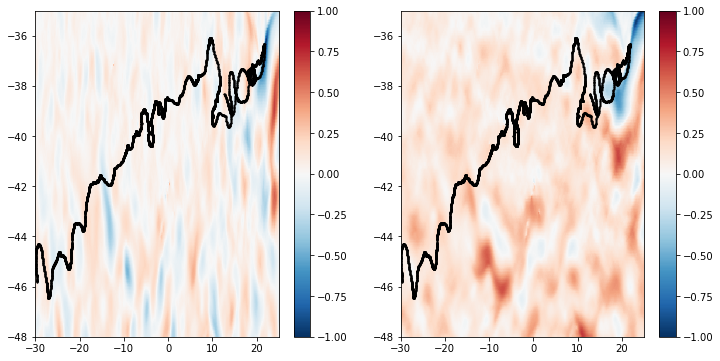

In [20]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
cs = ax[0].pcolormesh(ds.lon.isel(face=1),ds.lat.isel(face=1),ds.mean_SSV.isel(face=1),cmap='RdBu_r',vmin=-1,vmax=1)
cs1 = ax[1].pcolormesh(ds.lon.isel(face=1),ds.lat.isel(face=1),ds.mean_SSU.isel(face=1),cmap='RdBu_r',vmin=-1,vmax=1)
for a in ax:
    a.set_ylim(-48,-35);a.set_xlim(-30,25)
    a.scatter(df_tst.lon,df_tst.lat,s=1,c='k')
plt.colorbar(cs,ax=ax[0])
plt.colorbar(cs1,ax=ax[1])

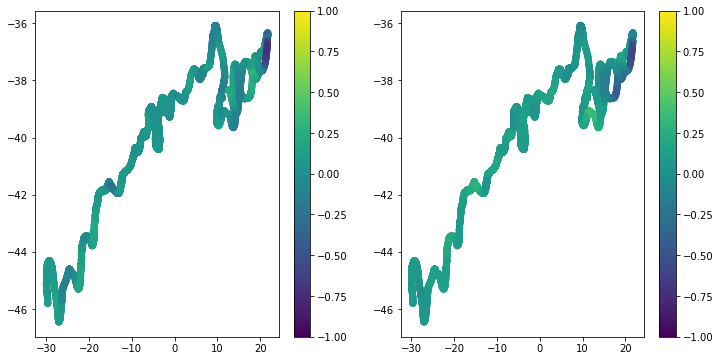

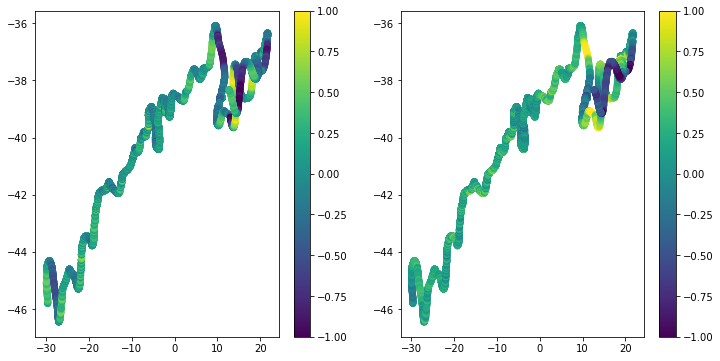

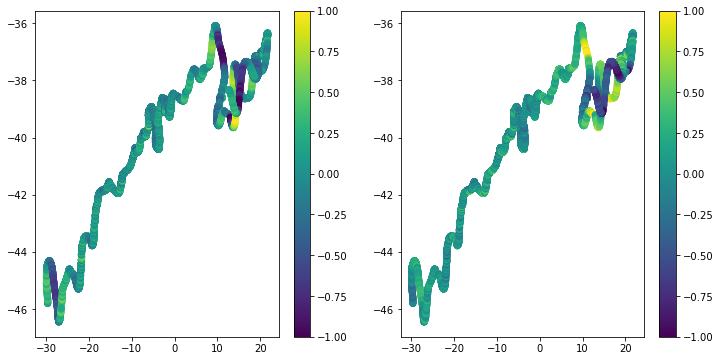

In [25]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
cs = ax[0].scatter(tst_idw.lon,tst_idw.lat,c=tst_idw.meridional_velocity,vmin=-1,vmax=1)
cs1 = ax[1].scatter(df_tst.lon,df_tst.lat,c=tst_idw.zonal_velocity,vmin=-1,vmax=1)
plt.colorbar(cs,ax=ax[0]);plt.colorbar(cs1,ax=ax[1])
fig,ax = plt.subplots(1,2,figsize=(12,6))
cs = ax[0].scatter(df_tst.lon,df_tst.lat,c=df_tst.meridional_velocity,vmin=-1,vmax=1)
cs1 = ax[1].scatter(df_tst.lon,df_tst.lat,c=df_tst.zonal_velocity,vmin=-1,vmax=1)
plt.colorbar(cs,ax=ax[0]);plt.colorbar(cs1,ax=ax[1])
fig,ax = plt.subplots(1,2,figsize=(12,6))
cs = ax[0].scatter(df_tst.lon,df_tst.lat,c=df_tst.meridional_velocity-tst_idw.meridional_velocity,vmin=-1,vmax=1)
cs1 = ax[1].scatter(df_tst.lon,df_tst.lat,c=df_tst.zonal_velocity-tst_idw.zonal_velocity,vmin=-1,vmax=1)
plt.colorbar(cs,ax=ax[0]);plt.colorbar(cs1,ax=ax[1])

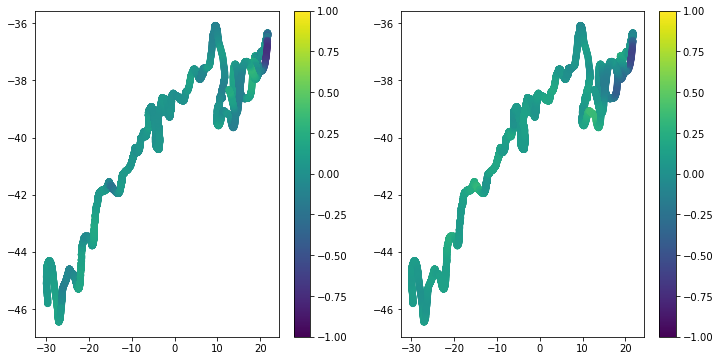

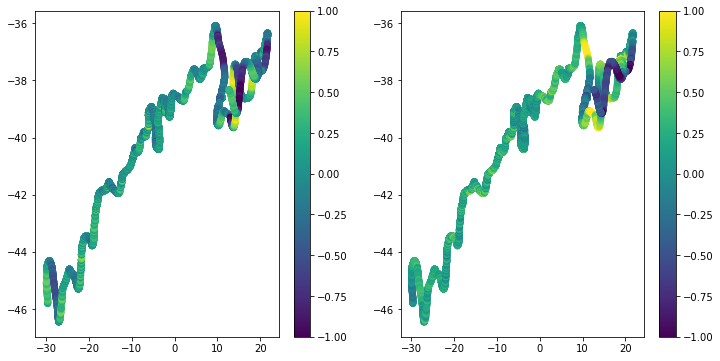

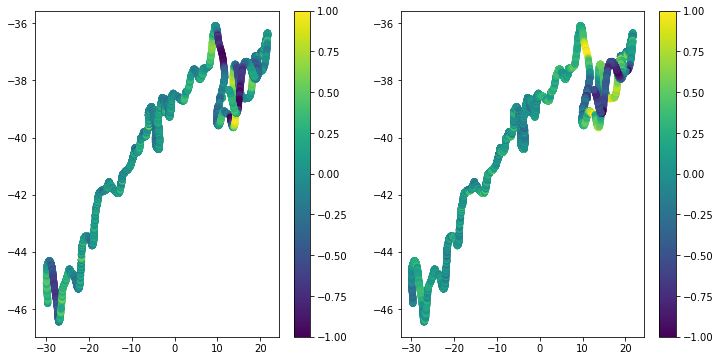

In [26]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
cs = ax[0].scatter(tst_rbf.lon,tst_rbf.lat,c=tst_rbf.meridional_velocity,vmin=-1,vmax=1)
cs1 = ax[1].scatter(df_tst.lon,df_tst.lat,c=tst_rbf.zonal_velocity,vmin=-1,vmax=1)
plt.colorbar(cs,ax=ax[0]);plt.colorbar(cs1,ax=ax[1])
fig,ax = plt.subplots(1,2,figsize=(12,6))
cs = ax[0].scatter(df_tst.lon,df_tst.lat,c=df_tst.meridional_velocity,vmin=-1,vmax=1)
cs1 = ax[1].scatter(df_tst.lon,df_tst.lat,c=df_tst.zonal_velocity,vmin=-1,vmax=1)
plt.colorbar(cs,ax=ax[0]);plt.colorbar(cs1,ax=ax[1])
fig,ax = plt.subplots(1,2,figsize=(12,6))
cs = ax[0].scatter(df_tst.lon,df_tst.lat,c=df_tst.meridional_velocity-tst_rbf.meridional_velocity,vmin=-1,vmax=1)
cs1 = ax[1].scatter(df_tst.lon,df_tst.lat,c=df_tst.zonal_velocity-tst_rbf.zonal_velocity,vmin=-1,vmax=1)
plt.colorbar(cs,ax=ax[0]);plt.colorbar(cs1,ax=ax[1])

In [38]:
df_sub = df.get_partition(0).persist()

In [44]:
df_sub.index.unique().compute()

0       39000000
1       39000001
2       39000002
3       39000003
4       39000004
          ...   
1065    38000777
1066    38001417
1067    38000292
1068    38000631
1069    38001494
Name: trajectory, Length: 1070, dtype: int64

In [46]:
tst2 = df_sub.groupby(df_sub.index).apply(interp_trajectories,['meridional_velocity'],['mean_SSV'],None,8,'idw')

/home1/datahome/zcaspar/miniconda3/envs/croco/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  """Entry point for launching an IPython kernel.


In [47]:
tst2 = tst2.persist()

In [61]:
tst2.index.compute()

MultiIndex([(-2147483648, -2147483648),
            (-2147483648, -2147483648),
            (-2147483648, -2147483648),
            (-2147483648, -2147483648),
            (-2147483648, -2147483648),
            (-2147483648, -2147483648),
            (-2147483648, -2147483648),
            (-2147483648, -2147483648),
            (-2147483648, -2147483648),
            (-2147483648, -2147483648),
            ...
            (   39000868,    39000868),
            (   39000868,    39000868),
            (   39000868,    39000868),
            (   39000868,    39000868),
            (   39000868,    39000868),
            (   39000868,    39000868),
            (   39000868,    39000868),
            (   39000868,    39000868),
            (   39000868,    39000868),
            (   39000868,    39000868)],
           names=['trajectory', 'trajectory'], length=1664832)

In [ ]:
df_tst2 = tst2.groupby(df.index).get_group(4000125).compute()

### Test whole map:


In [8]:
dl = 0.1
#dl = 1
lon_bins = np.arange(-180.,180., dl)
lat_bins = np.arange(-90., 90., dl)

In [11]:
from xhistogram.xarray import histogram
N = histogram(ds.lon.rename('lon'), ds.lat.rename('lat'), bins=[lon_bins, lat_bins], dim=['i', 'j', 'face'], block_size=None)
N = N.rename({'lon_bin': 'lon','lat_bin': 'lat'})
#N.plot(x='lon',y='lat')



In [12]:
Mean_SSU = histogram(ds.lon.rename('lon'), ds.lat.rename('lat'), 
                 bins=[lon_bins, lat_bins], 
                 weights= (ds.mean_SSU.rename({'i_g': 'i'})), 
                 dim=['i', 'j','face'],
                 block_size=None
                )
Mean_SSU = Mean_SSU.rename({'lon_bin': 'lon','lat_bin': 'lat'})/N

In [16]:
Mean_SSU

<xarray.DataArray 'histogram_lon_lat' (lon: 3599, lat: 1799)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lon      (lon) float64 -179.9 -179.9 -179.8 -179.7 ... 179.6 179.7 179.8
  * lat      (lat) float64 -89.95 -89.85 -89.75 -89.65 ... 89.65 89.75 89.85

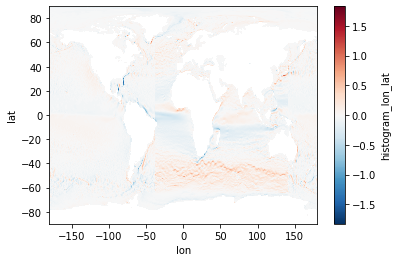

In [15]:
Mean_SSU.plot(x='lon',y='lat')

In [17]:
def interp_trajectories_bis(df,columns,var_mean,radius,k,method):
    df_interp = df.copy()
    for i,V in enumerate(columns):
        mesh.packing(
        np.vstack((var_mean[i].lon.values.flatten(), var_mean[i].lat.values.flatten())).T,
        var_mean[i].values.flatten())
        
        mx, my = np.meshgrid(df.lon,
                            df.lat,
                            indexing="ij")
        if method=='idw':
            idw_eta, neighbors = mesh.inverse_distance_weighting(
            np.vstack((mx.flatten(), my.flatten())).T,
            within=True,  # Extrapolation is forbidden
            radius=radius,  # In a radius of 5.5 Km
            k=k,  # We are looking for at most 8 neighbours
            num_threads=0)
            interp_var = idw_eta.reshape(mx.shape)
        if method=='rbf':
            rbf_eta, neighbors = mesh.radial_basis_function(
            np.vstack((mx.flatten(), my.flatten())).T,
            within=True,  # Extrapolation is forbidden
            k=k,  # We are looking for at most 11 neighbours
            num_threads=0)
            interp_var = rbf_eta.reshape(mx.shape)
        df_interp[V] = np.diag(interp_var)
    return df_interp

In [32]:
[Mean_SSU][0].lon.values.flatten().size
[Mean_SSU][0].lat.values.flatten().size

1799

In [25]:
mesh.packing(
        np.vstack(([Mean_SSU][0].lon.values.flatten(), [Mean_SSU][0].lat.values.flatten())).T,
        [Mean_SSU][0].values.flatten())
#[Mean_SSU][0].lon.values.flatten()

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 3599 and the array at index 1 has size 1799

In [23]:
tst_idw_bis = interp_trajectories_bis(df_tst,['meridional_velocity'],[Mean_SSU],None,8,'idw')


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 3599 and the array at index 1 has size 1799

In [40]:
cluster.close()